In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df= pd.read_csv('/content/Data.csv')

In [ ]:
df.head()

,Unnamed: 0,merchant,time,amount_usd_in_cents
0,1,faa029c6b0,2034-06-17 23:34:14,6349
1,2,ed7a7d91aa,2034-12-27 00:40:38,3854
2,3,5608f200cf,2034-04-30 01:29:42,789
3,4,15b1a0d61e,2034-09-16 01:06:23,4452
4,5,4770051790,2034-07-22 16:21:42,20203


In [ ]:
df=df.drop(df.columns[0], axis=1)

In [ ]:
df.dtypes

Unnamed: 0              int64
merchant               object
time                   object
amount_usd_in_cents     int64
dtype: object

In [ ]:
df.head()

,merchant,time,amount_usd_in_cents
0,faa029c6b0,2034-06-17 23:34:14,6349
1,ed7a7d91aa,2034-12-27 00:40:38,3854
2,5608f200cf,2034-04-30 01:29:42,789
3,15b1a0d61e,2034-09-16 01:06:23,4452
4,4770051790,2034-07-22 16:21:42,20203


In [ ]:
df['time'].max()

'2034-12-31 07:59:40'

In [ ]:

df['time'] = pd.to_datetime(df['time'])

# Sort dataframe by time
df.sort_values(by='time', inplace=True)

# Group by 'merchant' to calculate features
grouped = df.groupby('merchant')

# First payment date
first_payment_date = grouped['time'].min()

# Last payment date
last_payment_date = grouped['time'].max()

# Total amount paid
total_amount_paid = grouped['amount_usd_in_cents'].sum()

# Number of payments in total
number_of_payments = grouped.size()

# Lifespan: time between first and last payment
lifespan = last_payment_date - first_payment_date

# Acquisition: time since first payment (assuming current date is 2034-12-31)
acquisition = pd.to_datetime('2034-12-31') - first_payment_date

# Recency: time since last payment (assuming current date is 2034-12-31)
recency = pd.to_datetime('2034-12-31') - last_payment_date

# Quarter of acquisition
acquisition_quarter = first_payment_date.dt.quarter

# Year of acquisition
acquisition_year = first_payment_date.dt.year

# Number of payments per day over the lifespan
number_of_payments_per_day = number_of_payments / (lifespan.dt.days + 1)  # Adding 1 to avoid division by zero

# Average order value per payment
average_order_value = total_amount_paid / number_of_payments

# Add the calculated features to a new DataFrame
features_df = pd.DataFrame({
    'first_payment_date': first_payment_date,
    'last_payment_date': last_payment_date,
    'total_amount_paid': total_amount_paid,
    'number_of_payments': number_of_payments,
    'lifespan': lifespan,
    'acquisition': acquisition,
    'recency': recency,
    'acquisition_quarter': acquisition_quarter,
    'acquisition_year': acquisition_year,
    'number_of_payments_per_day': number_of_payments_per_day,
    'average_order_value': average_order_value
})

# Optional: Calculate Q1, Q2, Q3, Q4 payments and transaction amounts
quarters = pd.cut(df['time'], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
quarterly_payments = df.groupby([df['merchant'], quarters])['time'].count().unstack(fill_value=0)
quarterly_transaction_amounts = df.groupby([df['merchant'], quarters])['amount_usd_in_cents'].sum().unstack(fill_value=0)
quarterly_payments.columns = [f'{col}_payments' for col in quarterly_payments.columns]
quarterly_transaction_amounts.columns = [f'{col}_amount' for col in quarterly_transaction_amounts.columns]

# Concatenate quarterly features with existing features_df
features_df = pd.concat([features_df, quarterly_payments, quarterly_transaction_amounts], axis=1)

# Now features_df contains all the generated features for each merchant


In [ ]:
features_df

,first_payment_date,last_payment_date,total_amount_paid,number_of_payments,lifespan,acquisition,recency,acquisition_quarter,acquisition_year,number_of_payments_per_day,average_order_value,Q1_payments,Q2_payments,Q3_payments,Q4_payments,Q1_amount,Q2_amount,Q3_amount,Q4_amount
merchant,,,,,,,,,,,,,,,,,,,
0002b63b92,2033-05-16 20:07:57,2033-05-16 20:07:57,3379,1,0 days 00:00:00,593 days 03:52:03,593 days 03:52:03,2,2033,1.000000,3379.000000,1,0,0,0,3379,0,0,0
0002d07bba,2034-10-11 17:02:26,2034-12-15 09:56:19,89278,4,64 days 16:53:53,80 days 06:57:34,15 days 14:03:41,4,2034,0.061538,22319.500000,0,0,0,4,0,0,0,89278
00057d4302,2033-05-30 01:30:52,2033-08-04 04:26:40,29521,28,66 days 02:55:48,579 days 22:29:08,513 days 19:33:20,2,2033,0.417910,1054.321429,17,11,0,0,20386,9135,0,0
000bcff341,2033-08-09 20:18:36,2033-08-09 20:18:36,7826,1,0 days 00:00:00,508 days 03:41:24,508 days 03:41:24,3,2033,1.000000,7826.000000,0,1,0,0,0,7826,0,0
000ddbf0ca,2033-06-02 13:25:12,2033-06-02 13:25:12,10299,1,0 days 00:00:00,576 days 10:34:48,576 days 10:34:48,2,2033,1.000000,10299.000000,1,0,0,0,10299,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd3e45675,2033-01-04 04:35:29,2033-01-27 00:32:30,72626,5,22 days 19:57:01,725 days 19:24:31,702 days 23:27:30,1,2033,0.217391,14525.200000,5,0,0,0,72626,0,0,0
ffe1f6b51a,2033-06-04 00:11:12,2034-02-19 01:33:10,281616,53,260 days 01:21:58,574 days 23:48:48,314 days 22:26:50,2,2033,0.203065,5313.509434,7,40,6,0,32181,220852,28583,0
ffe26b900d,2033-12-22 04:01:55,2034-11-21 14:02:34,959113,81,334 days 10:00:39,373 days 19:58:05,39 days 09:57:26,4,2033,0.241791,11840.901235,0,3,36,42,0,84037,498677,376399


In [ ]:
features_df['average_order_value'].describe()

count    1.435100e+04
mean     3.810458e+04
std      1.415186e+05
min      2.010000e+02
25%      5.738182e+03
50%      1.096500e+04
75%      2.732122e+04
max      8.887465e+06
Name: average_order_value, dtype: float64

In [ ]:
features_df['time_between_first_and_last_payment'] = (features_df['last_payment_date'] - features_df['first_payment_date']).dt.days + 1
features_df['lifespan_days'] = features_df['lifespan'].dt.days
features_df['acquisition_days'] = features_df['acquisition'].dt.days
features_df['recency_days'] = features_df['recency'].dt.days



Text(0.5, 0, 'Average Order Value')

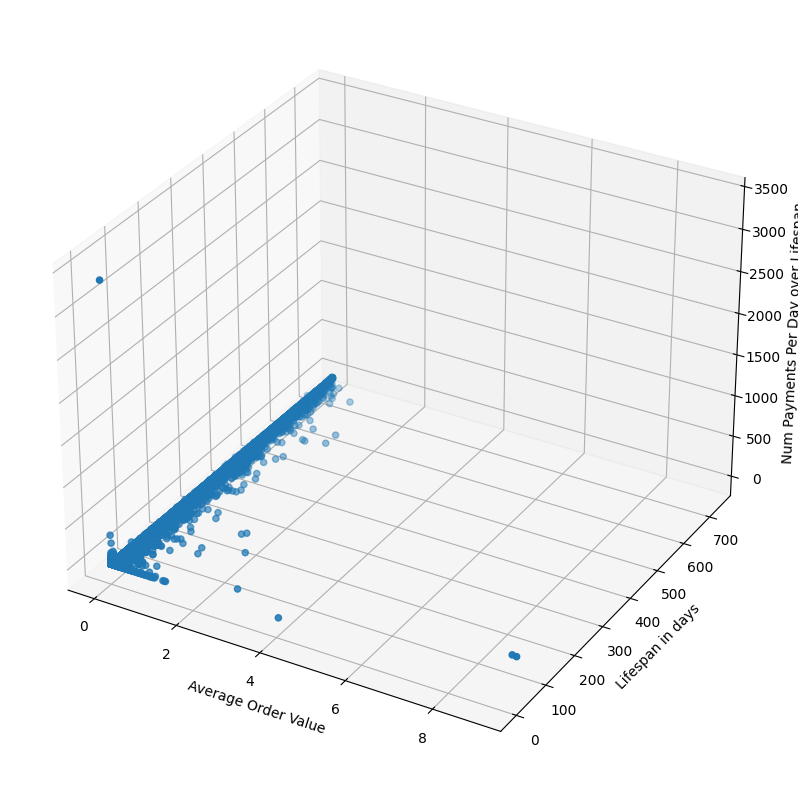

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')


zdata = features_df['number_of_payments_per_day']
ydata = features_df['time_between_first_and_last_payment']
xdata = features_df['average_order_value']


ax.scatter3D(xdata, ydata, zdata, s = 20);


ax.set_zlabel('Num Payments Per Day over Lifespan')
ax.set_ylabel('Lifespan in days')
ax.set_xlabel('Average Order Value')


In [ ]:
filtered_df = features_df[(features_df['number_of_payments_per_day'] < 3000) & (features_df['average_order_value'] <= 5.887465e+06)]
filtered_df

,first_payment_date,last_payment_date,total_amount_paid,number_of_payments,lifespan,acquisition,recency,acquisition_quarter,acquisition_year,number_of_payments_per_day,...,Q3_payments,Q4_payments,Q1_amount,Q2_amount,Q3_amount,Q4_amount,time_between_first_and_last_payment,lifespan_days,acquisition_days,recency_days
merchant,,,,,,,,,,,,,,,,,,,,,
0002b63b92,2033-05-16 20:07:57,2033-05-16 20:07:57,3379,1,0 days 00:00:00,593 days 03:52:03,593 days 03:52:03,2,2033,1.000000,...,0,0,3379,0,0,0,1,0,593,593
0002d07bba,2034-10-11 17:02:26,2034-12-15 09:56:19,89278,4,64 days 16:53:53,80 days 06:57:34,15 days 14:03:41,4,2034,0.061538,...,0,4,0,0,0,89278,65,64,80,15
00057d4302,2033-05-30 01:30:52,2033-08-04 04:26:40,29521,28,66 days 02:55:48,579 days 22:29:08,513 days 19:33:20,2,2033,0.417910,...,0,0,20386,9135,0,0,67,66,579,513
000bcff341,2033-08-09 20:18:36,2033-08-09 20:18:36,7826,1,0 days 00:00:00,508 days 03:41:24,508 days 03:41:24,3,2033,1.000000,...,0,0,0,7826,0,0,1,0,508,508
000ddbf0ca,2033-06-02 13:25:12,2033-06-02 13:25:12,10299,1,0 days 00:00:00,576 days 10:34:48,576 days 10:34:48,2,2033,1.000000,...,0,0,10299,0,0,0,1,0,576,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd3e45675,2033-01-04 04:35:29,2033-01-27 00:32:30,72626,5,22 days 19:57:01,725 days 19:24:31,702 days 23:27:30,1,2033,0.217391,...,0,0,72626,0,0,0,23,22,725,702
ffe1f6b51a,2033-06-04 00:11:12,2034-02-19 01:33:10,281616,53,260 days 01:21:58,574 days 23:48:48,314 days 22:26:50,2,2033,0.203065,...,6,0,32181,220852,28583,0,261,260,574,314
ffe26b900d,2033-12-22 04:01:55,2034-11-21 14:02:34,959113,81,334 days 10:00:39,373 days 19:58:05,39 days 09:57:26,4,2033,0.241791,...,36,42,0,84037,498677,376399,335,334,373,39


In [ ]:
features_df['average_order_value'].describe()

count    1.435100e+04
mean     3.810458e+04
std      1.415186e+05
min      2.010000e+02
25%      5.738182e+03
50%      1.096500e+04
75%      2.732122e+04
max      8.887465e+06
Name: average_order_value, dtype: float64

In [ ]:
high_average_order_df = features_df[features_df['average_order_value'] > 8]
features_df['average_order_value'] > 8

merchant
0002b63b92    True
0002d07bba    True
00057d4302    True
000bcff341    True
000ddbf0ca    True
              ... 
ffd3e45675    True
ffe1f6b51a    True
ffe26b900d    True
ffec05edb9    True
fff1754102    True
Name: average_order_value, Length: 14351, dtype: bool

In [ ]:
filtered_df.shape

(14348, 23)

Text(0.5, 0, 'Average Order Value')

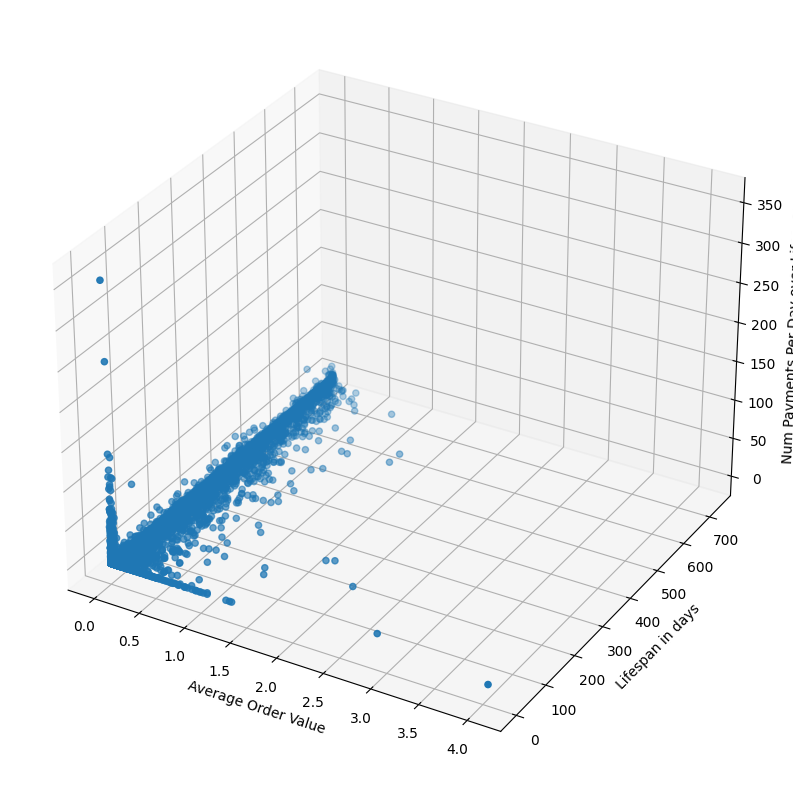

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')


zdata = filtered_df['number_of_payments_per_day']
ydata = filtered_df['time_between_first_and_last_payment']
xdata = filtered_df['average_order_value']


ax.scatter3D(xdata, ydata, zdata, s = 20);


ax.set_zlabel('Num Payments Per Day over Lifespan')
ax.set_ylabel('Lifespan in days')
ax.set_xlabel('Average Order Value')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

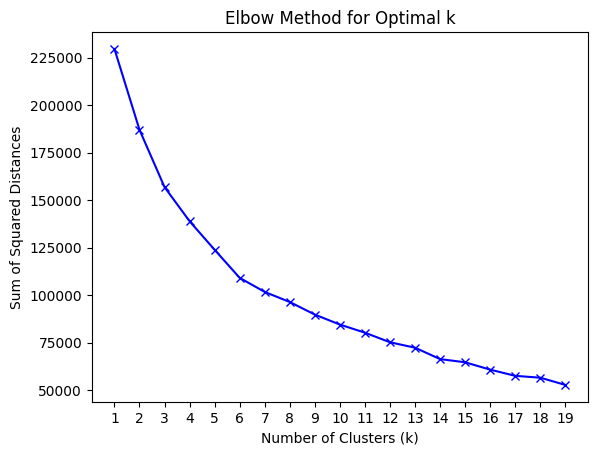

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = [
    'total_amount_paid',
    'number_of_payments',
    'number_of_payments_per_day',
    'average_order_value',
    'lifespan_days',
    'acquisition_days',
    'recency_days',
    'Q1_payments',
    'Q2_payments',
    'Q3_payments',
    'Q4_payments',
    'Q1_amount',
    'Q2_amount',
    'Q3_amount',
    'Q4_amount',
    'time_between_first_and_last_payment'
]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(filtered_df[clustering_features])

# Define a range of k values for testing
k_values = range(1, 20)  # You can adjust the range as needed

# Initialize empty list to store sum of squared distances for each k
sum_of_squared_distances = []

# Calculate sum of squared distances for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()


In [ ]:
features_df.dtypes

first_payment_date                      datetime64[ns]
last_payment_date                       datetime64[ns]
total_amount_paid                                int64
number_of_payments                               int64
lifespan                               timedelta64[ns]
acquisition                            timedelta64[ns]
recency                                timedelta64[ns]
acquisition_quarter                              int64
acquisition_year                                 int64
number_of_payments_per_day                     float64
average_order_value                            float64
Q1_payments                                      int64
Q2_payments                                      int64
Q3_payments                                      int64
Q4_payments                                      int64
Q1_amount                                        int64
Q2_amount                                        int64
Q3_amount                                        int64
Q4_amount 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-166-ad74462952fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = pred


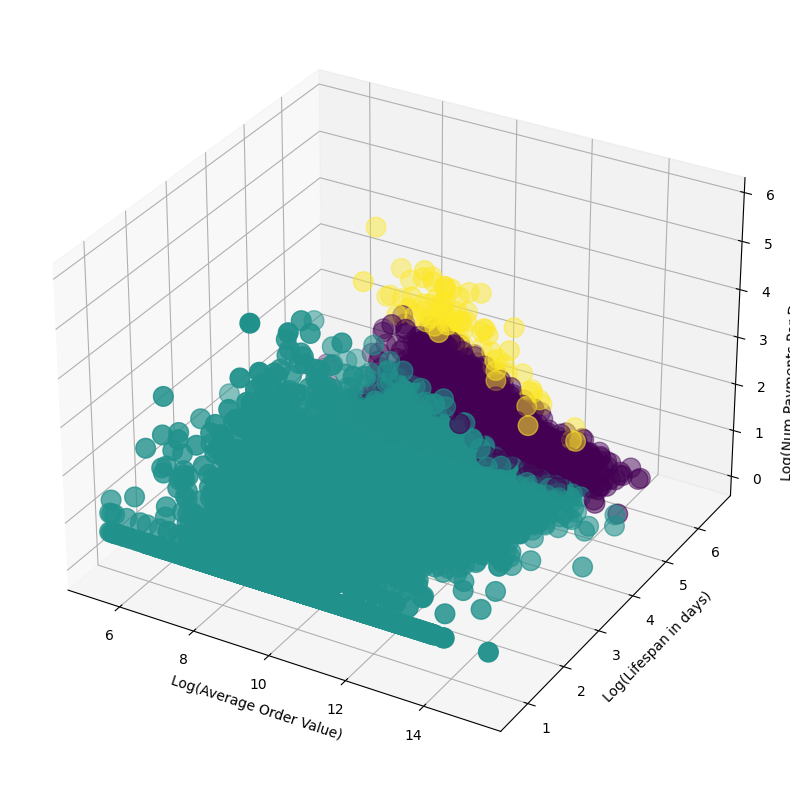

In [ ]:
#filtered_df=filtered_df.drop('cluster', axis=1)
kmeans = KMeans(n_clusters = 3,
                    init='k-means++',
                   random_state = 42)
kmeans.fit(features_scaled)
pred = kmeans.predict(features_scaled)
filtered_df['cluster'] = pred


# Logarithmically transform the data
xdata_log = np.log1p(filtered_df['average_order_value'])  # Logarithmic transformation for x-axis
ydata_log = np.log1p(filtered_df['time_between_first_and_last_payment'])  # Logarithmic transformation for y-axis
zdata_log = np.log1p(filtered_df['number_of_payments_per_day'])  # Logarithmic transformation for z-axis

# Create the 3D scatter plot with logarithmic axes
plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')

# Scatter plot of data points
ax.scatter3D(xdata_log, ydata_log, zdata_log, c=filtered_df['cluster'], s=200)

# Set labels with log scale
ax.set_xlabel('Log(Average Order Value)')
ax.set_ylabel('Log(Lifespan in days)')
ax.set_zlabel('Log(Num Payments Per Day over Lifespan)')

plt.show()


In [ ]:
# Group the DataFrame by 'cluster' and calculate summary statistics
cluster_summary = filtered_df.groupby('cluster').agg(
    cluster_count=('cluster', 'count'),
    num_payments=('number_of_payments', 'sum'),
    num_payments_per_day_in_life=('number_of_payments_per_day', 'mean'),
    amount_usd_in_cents=('total_amount_paid', 'sum'),
    avg_time_bw_payments=('time_between_first_and_last_payment', 'mean'),
    time_since_first_payment=('acquisition_days', 'mean'),
    time_since_last_payment=('recency_days', 'mean'),
    time_between_first_and_last_payment=('time_between_first_and_last_payment', 'mean')
)

# Rename columns
cluster_summary.rename(columns={'cluster_count': 'cluster_count'}, inplace=True)

# Calculate additional metrics
cluster_summary['aov'] = cluster_summary['amount_usd_in_cents'] / cluster_summary['num_payments']
cluster_summary['ltv_per_person'] = cluster_summary['amount_usd_in_cents'] / cluster_summary['cluster_count']

# Round the summary statistics
cluster_summary = cluster_summary.round({
    'num_payments_per_day_in_life': 2,
    'time_between_first_and_last_payment': 2,
    'aov': 0
})

# Select specific columns for the final summary
cluster_summary_final = cluster_summary[['cluster_count', 'num_payments_per_day_in_life', 'time_between_first_and_last_payment', 'aov', 'ltv_per_person']]

# Print the cluster summary
print("Cluster Summary:")
print(cluster_summary_final)


Cluster Summary:
         cluster_count  num_payments_per_day_in_life  \
cluster                                                
0                 4656                          0.44   
1                 9612                          1.47   
2                   80                         11.64   

         time_between_first_and_last_payment      aov  ltv_per_person  
cluster                                                                
0                                     453.95  17247.0    3.204553e+06  
1                                      75.02  16439.0    4.040581e+05  
2                                     527.34  11031.0    5.639636e+07  


Number of clusters found by DBSCAN: 3


<ipython-input-168-ed83212608f1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = pred


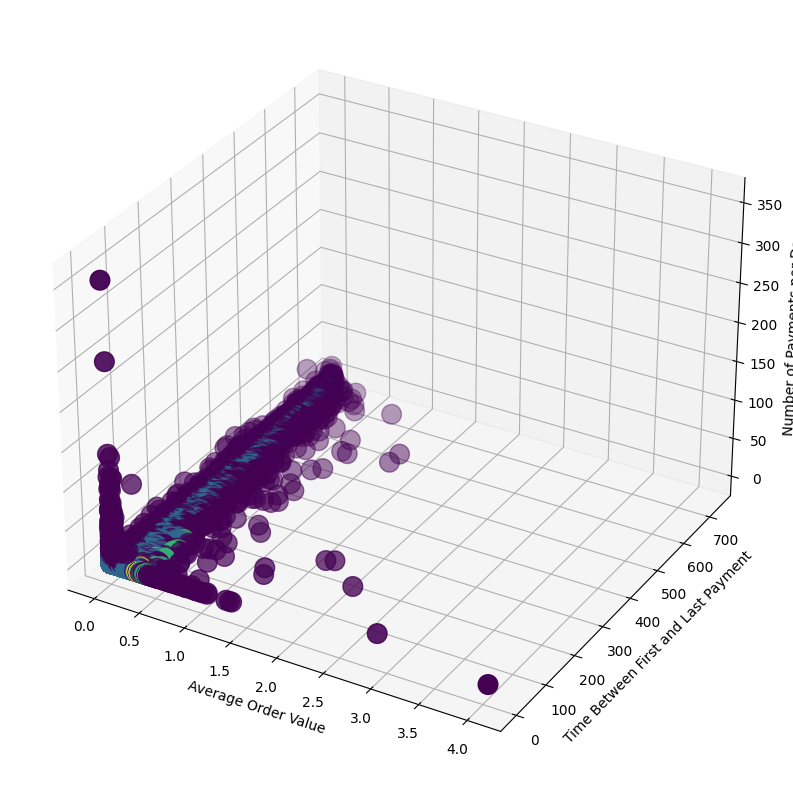

In [ ]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the scaled features
dbscan.fit(features_scaled)

# Predict cluster labels
pred = dbscan.labels_
# Get the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print the number of clusters
print('Number of clusters found by DBSCAN:', n_clusters)
# Add predicted cluster labels to the DataFrame
filtered_df['cluster'] = pred

# Plot the 3D scatter plot
plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')

# Scatter plot of data points
ax.scatter3D(filtered_df['average_order_value'], filtered_df['time_between_first_and_last_payment'], filtered_df['number_of_payments_per_day'], c=filtered_df['cluster'], s=200)

# Set labels
ax.set_xlabel('Average Order Value')
ax.set_ylabel('Time Between First and Last Payment')
ax.set_zlabel('Number of Payments per Day')

plt.show()


In [ ]:
#df['time'] = pd.to_datetime(df['time'])

# Group the data by 'merchant' and calculate the time difference
time_difference = df.groupby('merchant')['time'].apply(lambda x: (x.max() - x.min()).days).reset_index(name='time_difference')



In [ ]:

time_difference

,merchant,time_difference
0,0002b63b92,0
1,0002d07bba,64
2,00057d4302,66
3,000bcff341,0
4,000ddbf0ca,0
...,...,...
14346,ffd3e45675,22
14347,ffe1f6b51a,260
14348,ffe26b900d,334
14349,ffec05edb9,20


In [ ]:
time_difference.describe()

,time_difference
count,14351.000000
mean,199.478085
std,203.849367
min,0.000000
25%,17.000000
50%,127.000000
75%,348.000000
max,728.000000


In [ ]:

# Define pre and post periods
pre_period_end = pd.to_datetime("2034-10-31")
post_period_start = pd.to_datetime("2034-11-01")

# Filter data for pre and post periods
payments_pre = df[df['time'] <= pre_period_end]
payments_post = df[df['time'] >= post_period_start]

# Determine merchant presence in post period
merchant_post = payments_post['merchant'].unique()

# Roll up pre-period data to merchant level
merchant_level = filtered_df.copy()
merchant_level.reset_index(inplace=True)

print(merchant_level.columns)
# Define churn status based on presence in post period
merchant_level['churn'] = merchant_level['merchant'].isin(merchant_post)

# Convert boolean churn status to string labels
merchant_level['churn'] = merchant_level['churn'].replace({True: 'Churned', False: 'Active'})

# Class balance
class_balance = merchant_level['churn'].value_counts()
print("Class Balance:")
print(class_balance)

Index(['merchant', 'first_payment_date', 'last_payment_date',
       'total_amount_paid', 'number_of_payments', 'lifespan', 'acquisition',
       'recency', 'acquisition_quarter', 'acquisition_year',
       'number_of_payments_per_day', 'average_order_value', 'Q1_payments',
       'Q2_payments', 'Q3_payments', 'Q4_payments', 'Q1_amount', 'Q2_amount',
       'Q3_amount', 'Q4_amount', 'time_between_first_and_last_payment',
       'lifespan_days', 'acquisition_days', 'recency_days', 'cluster'],
      dtype='object')
Class Balance:
Churned    7526
Active     6822
Name: churn, dtype: int64


In [ ]:
merchant_level['churn'].value_counts()

Churned    7526
Active     6822
Name: churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
cols = [
    'total_amount_paid',
    'number_of_payments',
    'number_of_payments_per_day',
    'average_order_value',
    'lifespan_days',
    'acquisition_days',
    'recency_days',
    'Q1_payments',
    'Q2_payments',
    'Q3_payments',
    'Q4_payments',
    'Q1_amount',
    'Q2_amount',
    'Q3_amount',
    'Q4_amount',
    'time_between_first_and_last_payment',
    'churn',
    'merchant'
]
features_data  = merchant_level[cols]
y = features_data['churn']
X = features_data.drop(columns = 'churn')
X_id = X['merchant']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.20,
                                                   random_state = 0)


X_train_id = X_train['merchant']
X_test_id = X_test['merchant']
X_train = X_train.drop(columns = 'merchant')
X_test = X_test.drop(columns = 'merchant')


In [ ]:
scaler = StandardScaler()


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = X_train.columns.values
X_train_scaled.index = X_train.index.values


X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_test_scaled.columns = X_test.columns.values
X_test_scaled.index = X_test.index.values


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


model = LogisticRegression(random_state = 42)
model.fit(X_train_scaled, y_train)


prediction_test = model.predict(X_test_scaled)
metrics.confusion_matrix(y_test, prediction_test)


array([[1359,   15],
       [   0, 1496]])

In [ ]:
y_test

9374     Churned
1191      Active
7969      Active
1217      Active
3872     Churned
          ...   
10263    Churned
1351      Active
8682     Churned
4029      Active
2529     Churned
Name: churn, Length: 2870, dtype: object

In [ ]:
accuracy = metrics.accuracy_score(y_test, prediction_test)
print(accuracy)


0.9947735191637631


In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)


# Predict on test set
pred_y_rf = clf_rf.predict(X_test)
metrics.confusion_matrix(y_test, pred_y_rf)


array([[1374,    0],
       [   0, 1496]])

In [ ]:
acc_rf=metrics.accuracy_score(y_test, pred_y_rf)

print(acc_rf)

1.0
